In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import cv2

In [2]:
model = torch.load("./models/model1.pt")
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=100, bias=True)
  (5): LogSoftmax(dim=1)
)

In [3]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [46]:
cv2.IMREAD_ANYDEPTH

2

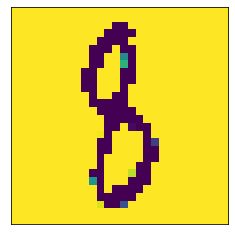

torch.Size([1, 28, 28])

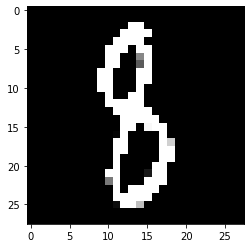

In [51]:
from PIL import Image

imsize = (28, 28)
# imsize = torch.Size([1,28,28])
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

def image_loader():
    """load image, returns cuda tensor"""
#     image = Image.open(image_name)
#     image = loader(image).float()
    image = cv2.imread('./img/img_test/test_image_8.png', cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28,28))
    
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])  
    plt.show()
    plt.imshow(image.squeeze(), cmap='gray_r')    
    
    image = Image.fromarray(image)
    image = loader(image)
#     image = torch.autograd.Variable(image, requires_grad=True)
    return image

img = image_loader()
img.size()

Predicted Digit = 7


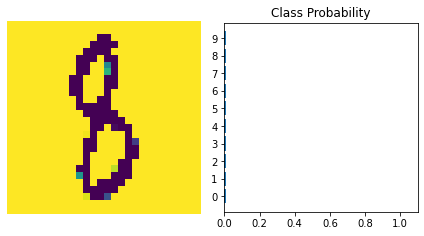

In [48]:
img = img.view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps[0][0])